In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
import datetime

In [9]:
bb = pd.read_csv("baseball.csv")
bb

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN


In [10]:
bb = bb.drop(columns=["RankSeason", "RankPlayoffs"], axis=1)
bb

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,162,0.335,0.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,163,NaN,NaN


In [11]:
bbd = pd.get_dummies(bb, drop_first=True, columns=["Team", "League", "Year"])
bbd

,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG,...,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012
0,734,688,81,0.328,0.418,0.259,0,162,0.317,0.415,...,False,False,False,False,False,False,False,False,False,True
1,700,600,94,0.320,0.389,0.247,1,162,0.306,0.378,...,False,False,False,False,False,False,False,False,False,True
2,712,705,93,0.311,0.417,0.247,1,162,0.315,0.403,...,False,False,False,False,False,False,False,False,False,True
3,734,806,69,0.315,0.415,0.260,0,162,0.331,0.428,...,False,False,False,False,False,False,False,False,False,True
4,613,759,61,0.302,0.378,0.240,0,162,0.335,0.424,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,705,759,81,0.330,0.390,0.260,0,161,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1228,706,626,93,0.321,0.394,0.268,0,161,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1229,878,690,103,0.341,0.441,0.278,1,165,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
1230,774,664,84,0.335,0.394,0.271,0,163,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


In [13]:
bb.isna().sum()

Team          0
League        0
Year          0
RS            0
RA            0
W             0
OBP           0
SLG           0
BA            0
Playoffs      0
G             0
OOBP        812
OSLG        812
dtype: int64

In [15]:
bbd = bbd.drop(columns=["OOBP", "OSLG"])
bbd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 93 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RS         1232 non-null   int64  
 1   RA         1232 non-null   int64  
 2   W          1232 non-null   int64  
 3   OBP        1232 non-null   float64
 4   SLG        1232 non-null   float64
 5   BA         1232 non-null   float64
 6   Playoffs   1232 non-null   int64  
 7   G          1232 non-null   int64  
 8   Team_ARI   1232 non-null   bool   
 9   Team_ATL   1232 non-null   bool   
 10  Team_BAL   1232 non-null   bool   
 11  Team_BOS   1232 non-null   bool   
 12  Team_CAL   1232 non-null   bool   
 13  Team_CHC   1232 non-null   bool   
 14  Team_CHW   1232 non-null   bool   
 15  Team_CIN   1232 non-null   bool   
 16  Team_CLE   1232 non-null   bool   
 17  Team_COL   1232 non-null   bool   
 18  Team_DET   1232 non-null   bool   
 19  Team_FLA   1232 non-null   bool   
 20  Team_HOU

In [16]:
X = bbd.drop("Playoffs", axis=1)
y = bbd["Playoffs"]
len(X)

1232

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.902834008097166

In [20]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)
model2.score(X_test, y_test)

C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9149797570850202

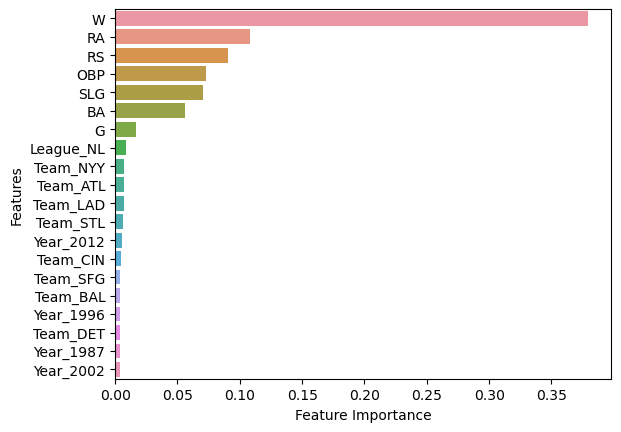

In [22]:
import seaborn as sns

def plot_features(columns, feature_importance):
    graph = pd.DataFrame({"Features" : columns, "Feature Importance" : feature_importance}).sort_values("Feature Importance", ascending = False).reset_index(drop=True)
    sns.barplot(x = "Feature Importance", y = "Features", data = graph[:20], orient="h" )
plot_features(X_train.columns, model.feature_importances_)